# Complete Practical Implementation Of Regression Models.

This dataset is about chance of admission in abraod.So by using this dataset we have to create and train the model which can predicts that based on the given GRE score,TOEFL Score ,University Rating,SOP , LOR value, what percentage of chance is there that student will get admission or not.

#### Steps  

1.Import the reuqired libraries

2.Load the dataset

3.Analyze the dataset(EDA):
     
       i. Profile of the Data:
       
             --> Check the Rows.
             --> Check the Columns.
             --> Checking Missing values.
             --> Category column.
             --> Numerical column.
             --> Checking Duplicates.
             --> Datatypes.
             --> Size of the Dataset.
             --> Check the multi-collinearity in the dataset
             
             
      ii. Statistics Analysis

             --> Covariance
             --> Correlation
             --> std
             --> variance
             --> T-test
             --> Chi-square test
             --> Z-Test
             --> Annova Test
             --> Mean,Mode and Median
             
             
     iii. Graph Based Analysis.
     
     
     
       
       

In [1]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the dataset or load the dataset

df=pd.read_csv(r"C:\Users\m3irs\OneDrive\Desktop\2021DataScience\2022DataScience\dataset\Admission_Prediction.csv")


### EDA(Exploratary Data Analysis)

##### Profile of the Data

In [3]:
# First 5 records
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# First 10 records
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [5]:
# Last 5 records
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95
400,399,312,103,3,3.5,4.0,8.78,0,0.67
401,400,333,117,4,5.0,4.0,9.66,1,0.95


In [6]:
#type of dataset
type(df)

pandas.core.frame.DataFrame

In [7]:
#info() : Gives the summary of the dataset like display all the columns and each column datatypes and each column total
#         number of not-null values and also the size of the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         402 non-null    int64  
 1   GRE Score          402 non-null    int64  
 2   TOEFL Score        402 non-null    int64  
 3   University Rating  402 non-null    int64  
 4   SOP                402 non-null    float64
 5   LOR                402 non-null    float64
 6   CGPA               402 non-null    float64
 7   Research           402 non-null    int64  
 8   Chance of Admit    402 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.4 KB


In [8]:
# Descriptive statistics of the dataset.
# describe() gives the descriptive statistics of the dataset.describe() bydefualt apply on the numerical dataset

df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,201.490050,316.835821,107.422886,3.089552,3.404229,3.455224,8.602015,0.547264,0.724776
std,116.174566,11.476004,6.077248,1.141789,1.007531,0.897064,0.597244,0.498381,0.142724
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,101.250000,308.250000,103.000000,2.000000,2.500000,3.000000,8.172500,0.000000,0.640000
50%,201.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.620000,1.000000,0.730000
75%,301.750000,325.000000,112.000000,4.000000,4.000000,4.000000,9.067500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
#Transpose version of the descriptive statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Serial No.,402.0,201.490050,116.174566,1.00,101.2500,201.50,301.7500,400.00
GRE Score,402.0,316.835821,11.476004,290.00,308.2500,317.00,325.0000,340.00
TOEFL Score,402.0,107.422886,6.077248,92.00,103.0000,107.00,112.0000,120.00
University Rating,402.0,3.089552,1.141789,1.00,2.0000,3.00,4.0000,5.00
SOP,402.0,3.404229,1.007531,1.00,2.5000,3.50,4.0000,5.00
LOR,402.0,3.455224,0.897064,1.00,3.0000,3.50,4.0000,5.00
CGPA,402.0,8.602015,0.597244,6.80,8.1725,8.62,9.0675,9.92
Research,402.0,0.547264,0.498381,0.00,0.0000,1.00,1.0000,1.00
Chance of Admit,402.0,0.724776,0.142724,0.34,0.6400,0.73,0.8300,0.97


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,402.0,201.490050,116.174566,1.00,101.2500,201.50,301.7500,400.00
GRE Score,402.0,316.835821,11.476004,290.00,308.2500,317.00,325.0000,340.00
TOEFL Score,402.0,107.422886,6.077248,92.00,103.0000,107.00,112.0000,120.00
University Rating,402.0,3.089552,1.141789,1.00,2.0000,3.00,4.0000,5.00
SOP,402.0,3.404229,1.007531,1.00,2.5000,3.50,4.0000,5.00
LOR,402.0,3.455224,0.897064,1.00,3.0000,3.50,4.0000,5.00
CGPA,402.0,8.602015,0.597244,6.80,8.1725,8.62,9.0675,9.92
Research,402.0,0.547264,0.498381,0.00,0.0000,1.00,1.0000,1.00
Chance of Admit,402.0,0.724776,0.142724,0.34,0.6400,0.73,0.8300,0.97


In [11]:
#Columns of the datatypes
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

#### Seperate the numerical dataset and categorical dataset

In [12]:
#Numerical variable
num_variables=df.dtypes[df.dtypes!='O'].index
num_variables

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [13]:
#No Categorical variable
cat_variables = df.dtypes[df.dtypes=='O']
cat_variables

Series([], dtype: object)

In [14]:
# shape of the datatypes
df.shape

(402, 9)

### Missing values treatment

Missing values are treated for each column separately.<br>

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.<br>

There are below options for treating missing values in data.<br>

<b>Delete the missing value rows if there are only few records</b><br>
* Impute the missing values with MEDIAN value for continuous variables.<br>
* Impute the missing values with MODE value for categorical variables.<br>
* Interpolate the values based on nearby values.<br>
* Interpolate the values based on business logic

In [15]:
#Missing values.For this dataset we dont have missing values

df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [16]:
#Display those column which has null 

[column for column in df.columns if df[column].isnull().sum()>0]

[]

In [17]:
#Checking the duplicates.
# df.duplicated() function gives True or False .True means that row have duplicate and False means that row doesnot have
# duplicate
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
397    False
398    False
399    False
400     True
401     True
Length: 402, dtype: bool

In [18]:
#Display which rows are duplicated
df[df.duplicated()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
400,399,312,103,3,3.5,4.0,8.78,0,0.67
401,400,333,117,4,5.0,4.0,9.66,1,0.95


In [19]:
# Removing the duplicates
df.drop_duplicates(inplace=True)

In [20]:
#Now there is no duplicates
df[df.duplicated()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [21]:
#Display all the columns datatypes
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [22]:
#Display the unique value of specific column
df['University Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [23]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
df.nunique()

Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

In [24]:
#Display the count of each unique value present in particular column.
df['University Rating'].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

#### What is Multi-collinearity

<b>Multicollinearity</b> means when two or more independent features are correlated to each other.The change in one of the collinear features may affect the other related features.
The presence of the correlated features may not add any new valuable information to the model, so better we can handle the
multicollinearity .

Multi-collinearity will not be a problem for certain models. Such as random forest or decision tree. For example, if we have two identical columns, decision tree / random forest will automatically "drop" one column at each split. And the model will still work well.


<b>How Multicollinearity occurs? </b><br>
Multicollinearity occurs in the dataset  due to poor designing of experiments while collecting the data or maybe introduced while creating new features.


<b>Various technique to check/detect the Multicollinearity </b>

1. Correlation Matrix : The Correlation matrix only works to detect collinearity between two features.
We have various statistical techniques to detect the collinearity between the two features.


--> a. Pearson correlation : It is used to detect the collinearity between two quantitive features only.
       Pandas libraries provide one function i.e dataframe.core(method='pearson')
        
--> b. Cramer’s V (uses chi-squared statistic) correlation : It is used to detect the collinearity between two categorical features
    
    or we can also use chi-squared test to detect the collinearity between two categorical features.

2. Variance Inflation Factors(VIF) : Correlation Matrix only works to detect the collinearity/relationship between
   two features , if we want to detect relationship between more than 2 features then correlation matrix fails.
   And here we use VIF. VIF another technique to detect the multicollinearity of the features.We find the VIF for each        independent variable and the the column which has higher VIF that means that variable has  higher correlation with  rest    variable
   
   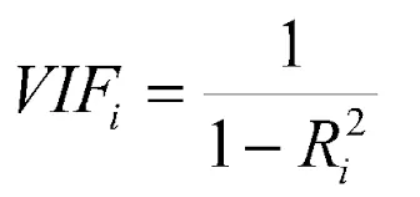

    VIF=1: No multicollinearity
    VIF between 1 to 5: Moderate multicollinearity 
    VIF > 5: Highly multicollinear 

#### Handle the multicollinearity
1. Correlation Matrix : if Correlation Matrix between two variable is > 0.6 ,0.7, 0.8 or 0.9 in magnitude and > -0.6,-0.7,-0.8,-0.9 in magntude that means two variable have higher correlation in that case we can remove one column
2. VIF : If VIF of any feature is > 5 that means that variable is highly correlated with rest variable in that case we can remove that column.

3. PCA (Princple Component Analysis) 
    
4. Lasso Regurailzation : Lasso regression is a linear regression technique with L1 prior as a regularize. The idea is to reduce the multicollinearity by regularization by reducing the coefficients of the feature that are multicollinear.

In [25]:
# # Vif 
# #Compute VIF data for each independent variable
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif = pd.DataFrame()
# vif["Feature"] = df.columns
# vif['VIF value'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
# vif

#### Graph Based Analysis.

<AxesSubplot:xlabel='TOEFL Score', ylabel='Density'>

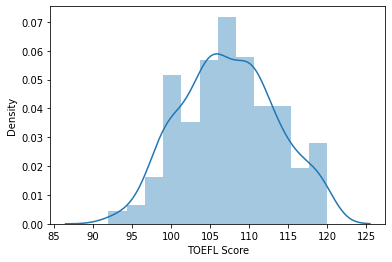

In [26]:
#Checking the skewness of particular column/ distribution of the particular column.

#This column is normally distributed
sns.distplot(df['TOEFL Score'])

<AxesSubplot:xlabel='University Rating', ylabel='Density'>

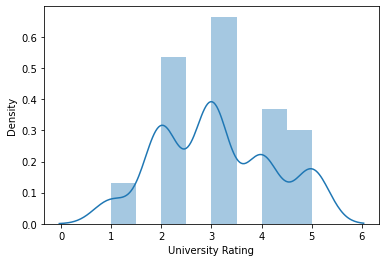

In [27]:
#This column is normally distributed

sns.distplot(df['University Rating'])

<AxesSubplot:xlabel='GRE Score', ylabel='Density'>

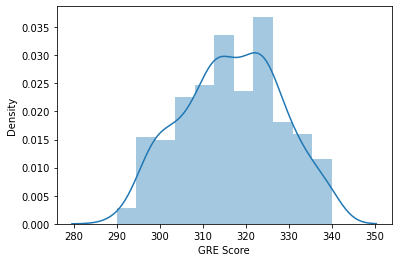

In [28]:
#This column is normally distributed
sns.distplot(df['GRE Score'])

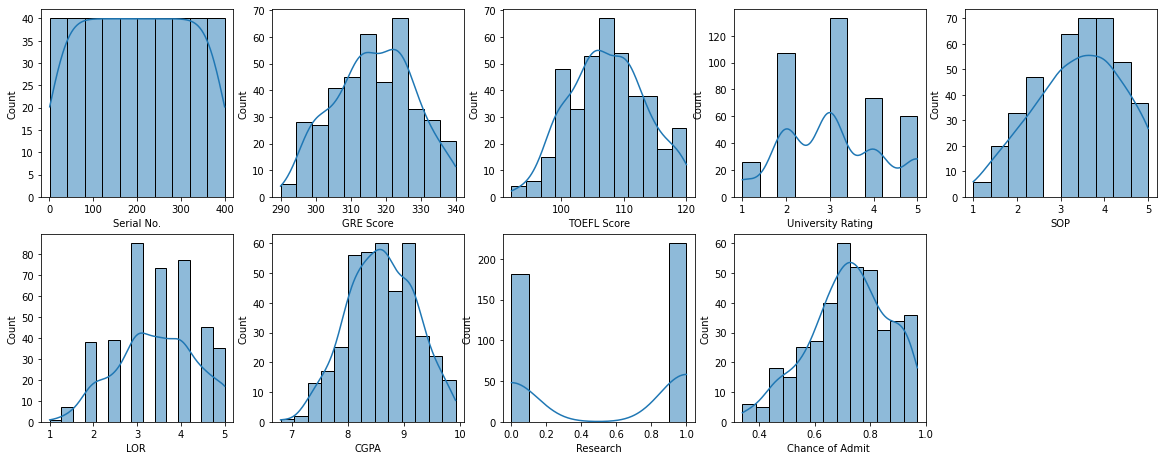

In [29]:
#Instead of checking skewness/distribution for  univariabte we can check skewness/distribution for multivariant

feature=[]
for i in df.columns:
    feature.append(i)
plt.figure(figsize=(20,20))
for i in range(len(feature)):
    plt.subplot(5,5,i+1)
    sns.histplot(df[feature[i]],kde=True)

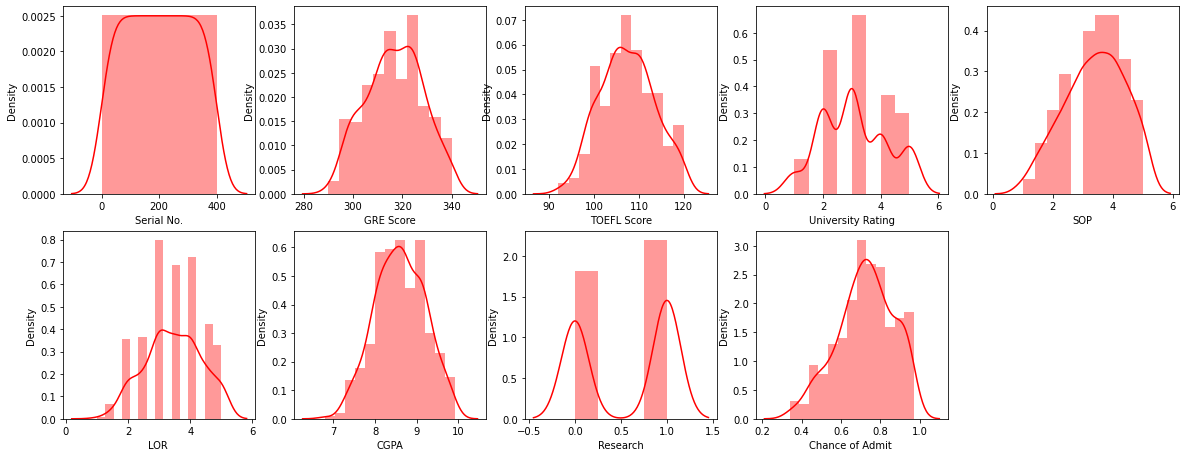

In [30]:
feature = []
for i in df.columns:
    feature.append(i)
plt.figure(figsize=(20,20))
for i in range(len(feature)):
    plt.subplot(5,5,i+1)
    sns.distplot(df[feature[i]],kde=True,color='Red')


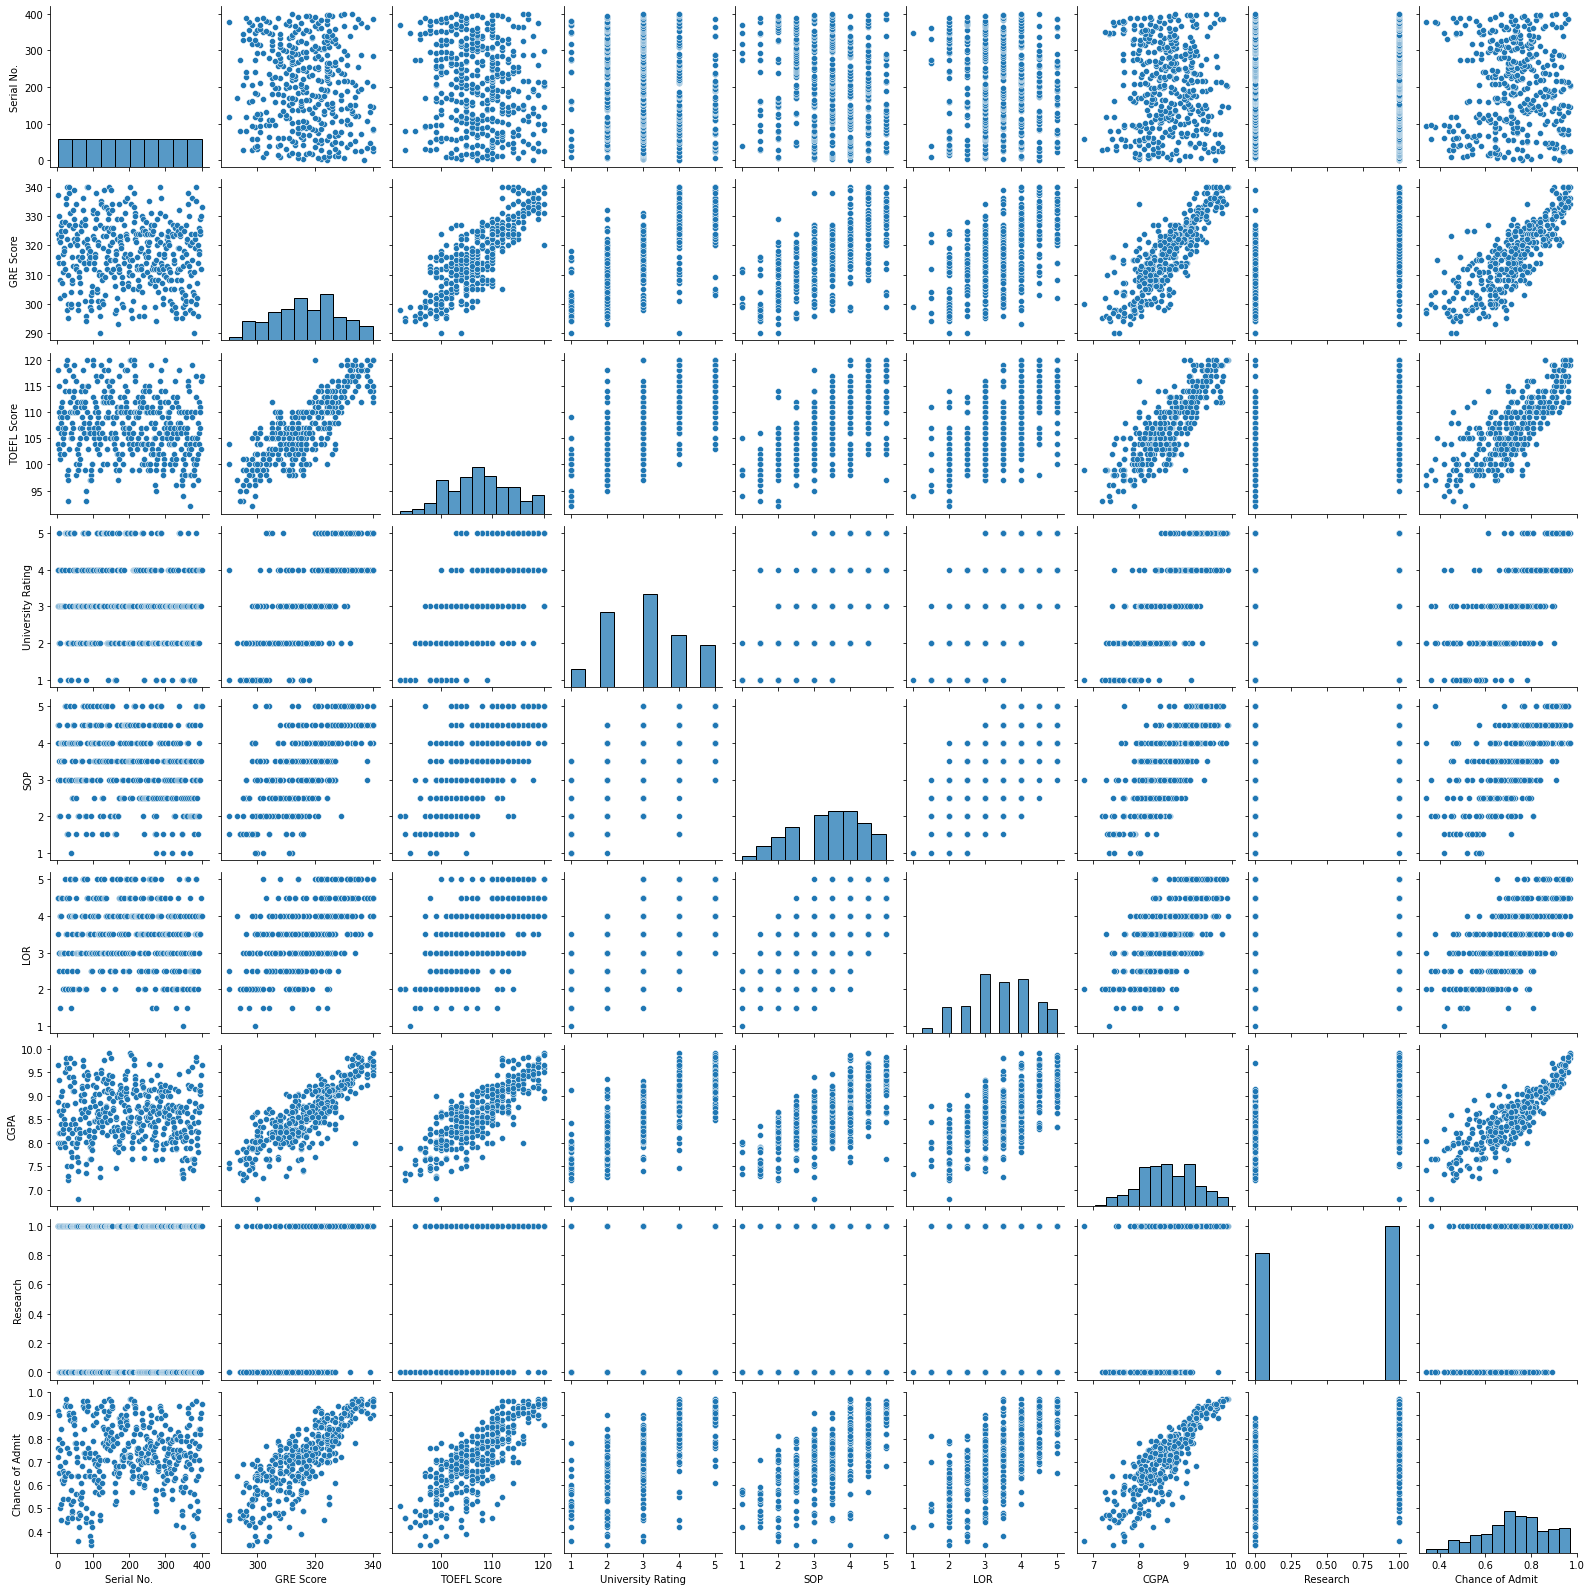

In [31]:
#We can use pairplot to  see distribution for univariant and plot pairwise  bivariant distribution in the dataset

sns.pairplot(df)

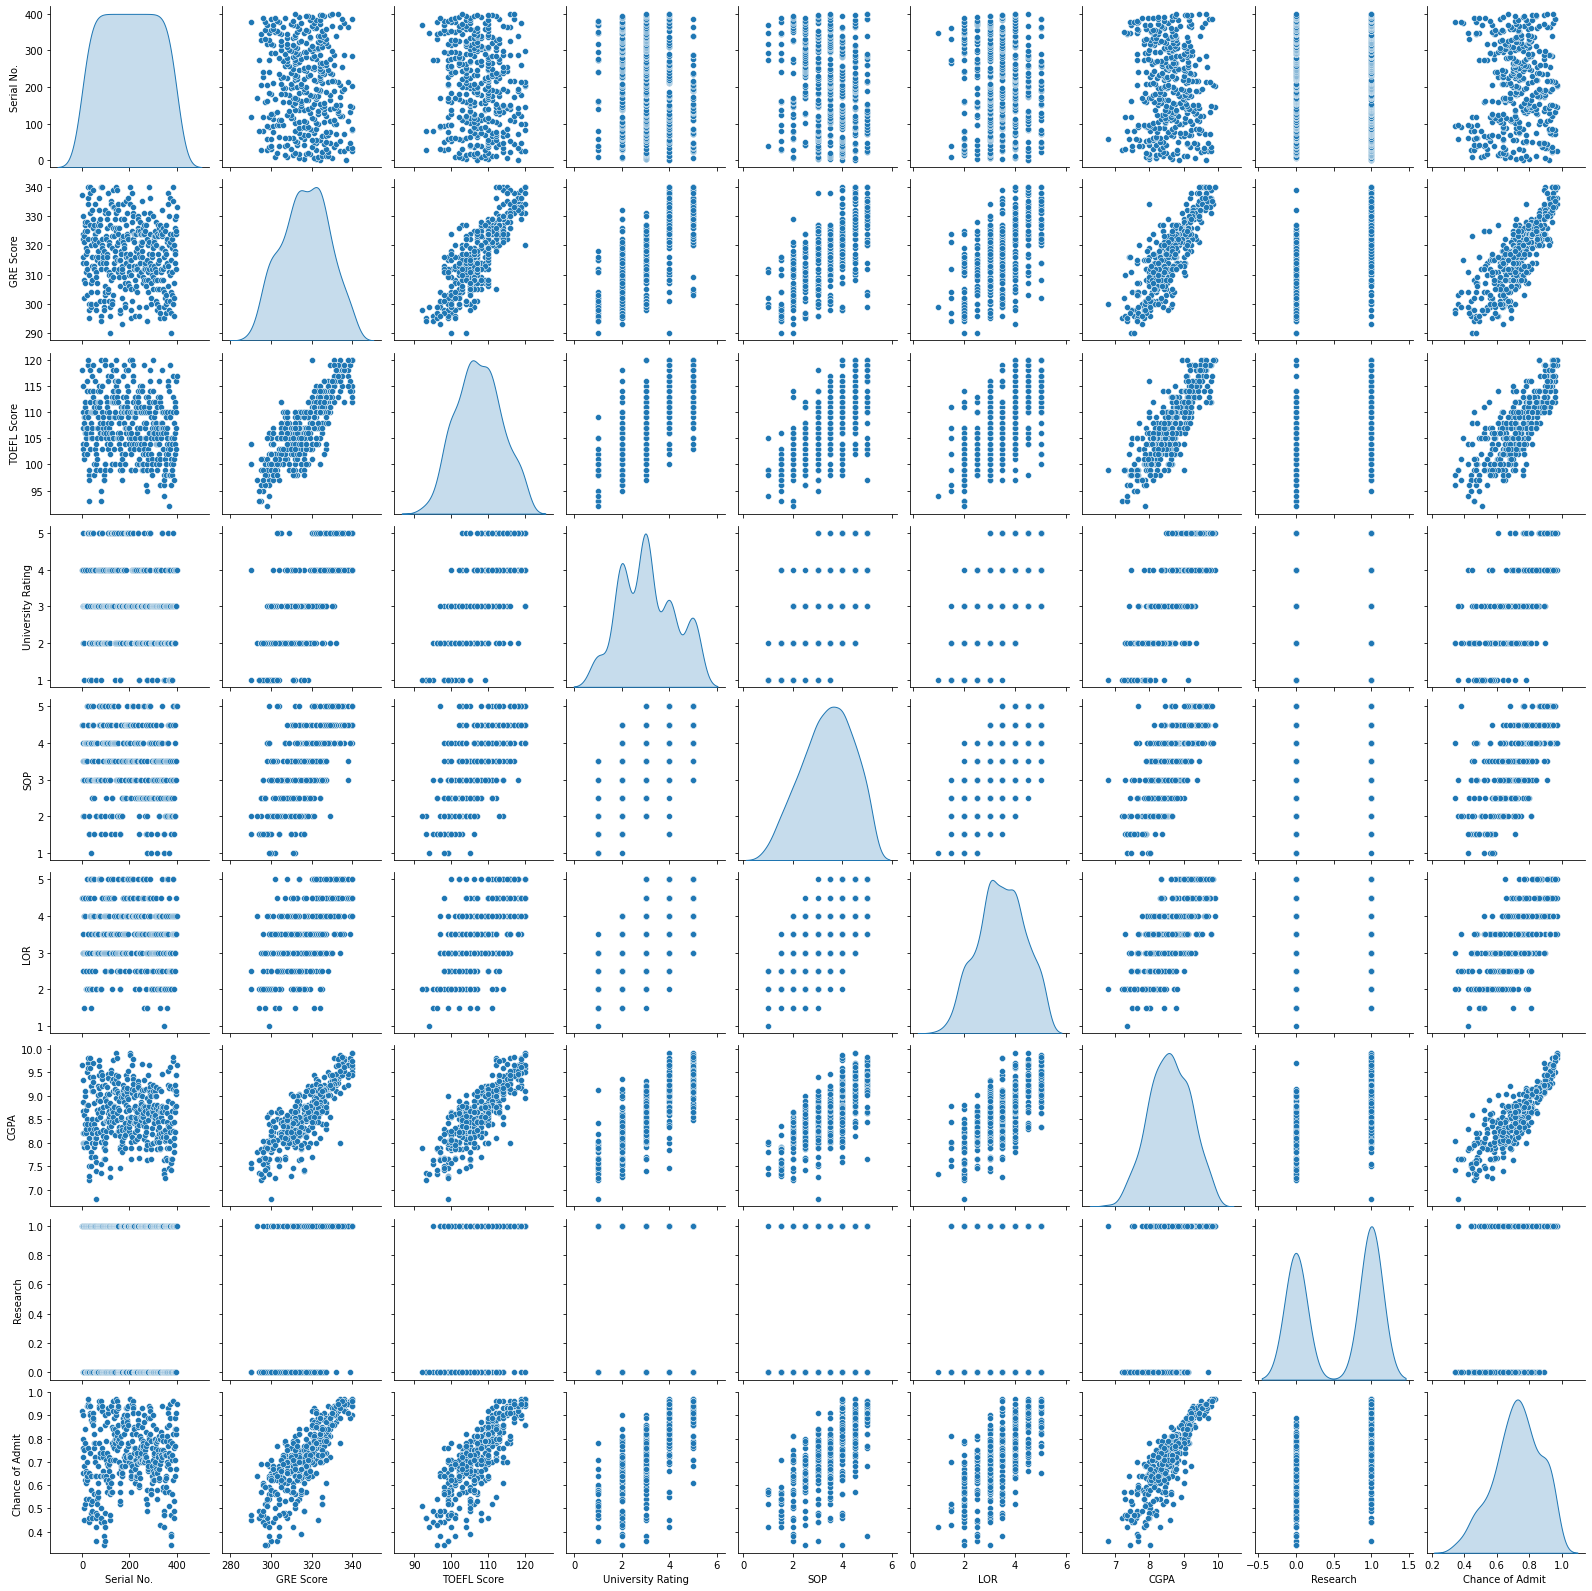

In [32]:
sns.pairplot(df,diag_kind='kde')

<AxesSubplot:>

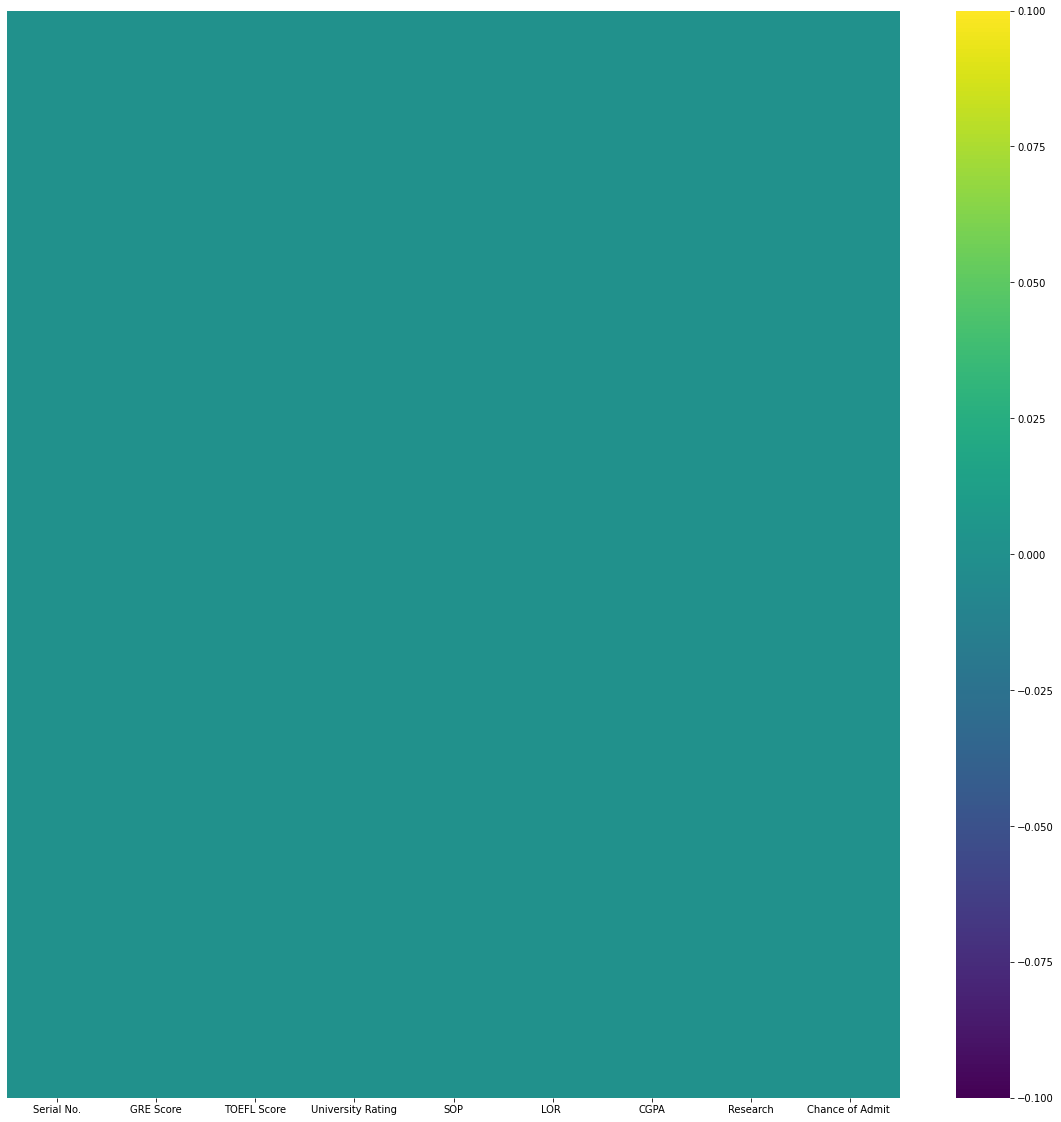

In [33]:
#Check the null value/missing value using heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:>

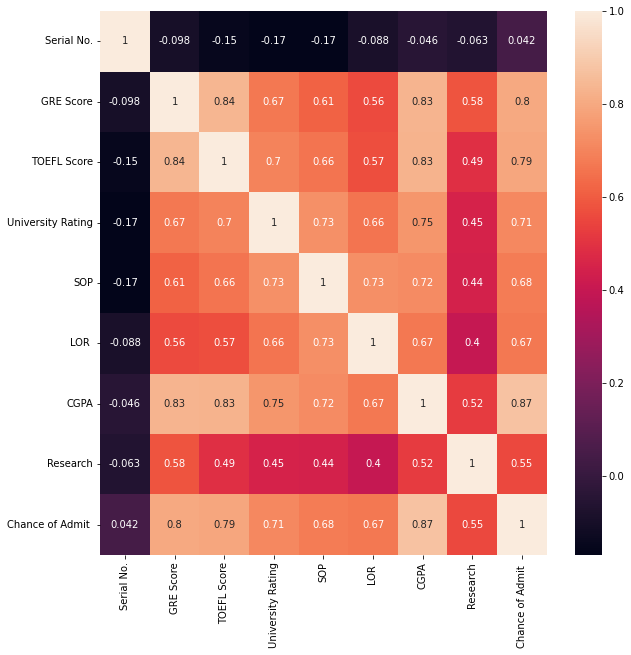

In [34]:
#Correlation Matrix between two quantitive variable using heatmap

# GREScore and CGPA are highlye correlated with each other
# TOEFLScore and CGPA are  highly correlated with each other but at the same time these variables are also 
# highly correlated with Target variable so we need these variable so should not drop this features.

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='pearson'),annot=True)

## Detecting Outliers

<p style="font-family:Century Gothic">If our dataset is small, we can detect the outlier by just looking at the dataset. But what if we have a huge dataset, how do we identify the outliers then? We need to use visualization and mathematical techniques.</p>

<p style="font-family:Century Gothic"> Below are some of the techniques of detecting outliers </p>

<p style="font-family:Century Gothic">
<b>Boxplots</b><br>
<b>Z-score</b> <br>
<b>Inter Quantile Range(IQR)</b>
</p>

<p style="font-family:Century Gothic"><b>1. Detecting outliers using Boxplot:</b><p>

<AxesSubplot:xlabel='CGPA'>

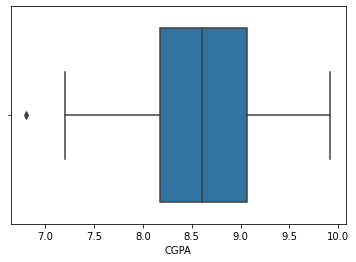

In [35]:
#Box plotting of "CGPA" for checking outlier

sns.boxplot(df['CGPA'])

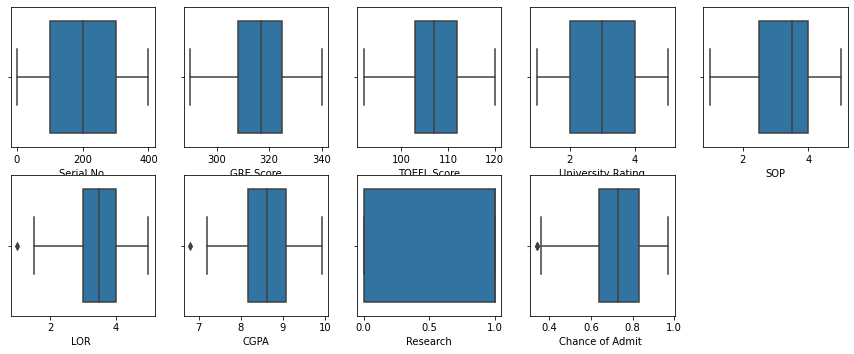

In [36]:
#Checking outliers with respect to all the numerical columns

#There is very little outlier for LOR,CGPA and TargetVariable(ChangeOfAdmit).So need to worry

feature =[]
for i in df.columns:
    feature.append(i)
plt.figure(figsize=(15,15))
for i in range(len(feature)):
    plt.subplot(5,5,i+1)
    sns.boxplot(df[feature[i]])

#### 3. Detecting outliers using IQR:



<p style="font-family:Century Gothic">Criteria: data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers.</p>

<p style="font-family:Century Gothic">steps: <br>
Calculate the 1st and 3rd quartiles(Q1, Q3) <br>
Compute IQR=Q3-Q1 <br>
Compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR) <br>
Loop through the values of the dataset and check for those who fall below the lower bound and above the upper bound and mark them as outliers
</p>

In [37]:
# Calculate quartile-1(Q1) for CGPA
q1=df['CGPA'].quantile(0.25)

In [38]:
# Calculate quartile-3(Q3) for CGPA
q3=df['CGPA'].quantile(0.75)

In [39]:
#Calculate the IQR
IQR = q3-q1
IQR

0.8925000000000001

In [40]:
#Lower bound
lower_limit = (q1-(1.5*IQR))

In [41]:
#upper bound
upper_limit = (q3+(1.5*IQR))

In [42]:
#Checking those data which is lower than lower bound.
#Only single outlier we have in CGPA so this record we need to handle it
df[df['CGPA']<lower_limit]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,59,300,99,1,3.0,2.0,6.8,1,0.36


In [43]:
#Checking those data which is greater than upper bound
df[df['CGPA']>upper_limit]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [44]:
# Calculate quartile-1(Q1) for LOR
q1=df['LOR '].quantile(0.25)

# Calculate quartile-3(Q3) for LOR
q3=df['LOR '].quantile(0.75)


IQR = q3-q1

lower_bound = q1-(1.5*IQR)
upper_bound = q3+(1.5*IQR)

#Checking those data which is greater than upper bound
df[df['LOR ']>upper_bound]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [45]:
#Checking those data which is lesser than lower bound
df[df['LOR ']<lower_bound]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,348,299,94,1,1.0,1.0,7.34,0,0.42


#### FEATURE ENGINEERING:

   * Handling missing values
   * Handling the outliers
   * Feature Selection
   * Transform the data/Data Preprocessing
   * Standarization



#### Why I should treat the outliers?

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

Option-1: Delete the outlier Records. Only if there are just few rows lost. <br>
Option-2: Impute the outlier values with a logical business value<br>


Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram

#### Replacing Outlier for CGPA

In [46]:
# Finding nearest values which is greater than 6.9 mark
df['CGPA'][df['CGPA']>6.9].sort_values(ascending=False)

143    9.92
202    9.91
203    9.87
385    9.82
34     9.80
       ... 
344    7.34
29     7.30
118    7.28
348    7.25
28     7.20
Name: CGPA, Length: 399, dtype: float64

In [47]:
#There is only 1 outlier for CGPA column and its value is 6.8 ,better we can remove the those record 
# if we have few rows which is outlier.But here we replace the outlier by some business logic
df['CGPA'][df['CGPA']<6.9] = 7.20

In [48]:
#Again checking the outlier for CGPA 

#Checking those data which is greater than lower bound
df[df['CGPA']<lower_limit]

#.Now there is no outlier


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


## Feature Selection
In Feature Selection finally we choose the best columns(Features) which are highly correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot <br>
* Categorical Vs Continuous---- Box Plot <br>
* Categorical Vs Categorical---- Grouped Bar Plots <br>

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix <br>
* Categorical Vs Continuous---- ANOVA test <br>
* Categorical Vs Categorical--- Chi-Square test <br>
In this case study the Target variable is Continuous, hence below two scenarios will be present <br>

Continuous Target Variable Vs Continuous Predictor<br>
Continuous Target Variable Vs Categorical Predictor<br>

### Categorical 
IF we see this dataset , all are datatypes of int and float right but if we see columns like SOP,LOR ,University Rating
this are int types of float types but these columns contain unqiue value < 20 which is likely to be categorical.
University Rating  comes under ordinal variable but its in numeric so no need to to convert this data.
SOP and LOR comes under nominal variable but again its in numeric format so no need to convert this data
Research comes under binary nominal variable again its in numeric format so no need to convert this data


In [49]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [50]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [51]:
df.nunique()

Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 167
Research               2
Chance of Admit       60
dtype: int64

In [52]:
#Lets take only continuous value
df_num = df[['GRE Score','TOEFL Score','CGPA']]
df_num

,GRE Score,TOEFL Score,CGPA
0,337,118,9.65
1,324,107,8.87
2,316,104,8.00
3,322,110,8.67
4,314,103,8.21
...,...,...,...
395,324,110,9.04
396,325,107,9.11
397,330,116,9.45
398,312,103,8.78


In [53]:
#lets take Nominal data and Ordinal data which is in numeric form and we consider these data as categorical
df_cat = df[['University Rating','SOP','LOR ','Research']]
df_cat

,University Rating,SOP,LOR,Research
0,4,4.5,4.5,1
1,4,4.0,4.5,1
2,3,3.0,3.5,1
3,3,3.5,2.5,1
4,2,2.0,3.0,0
...,...,...,...,...
395,3,3.5,3.5,1
396,3,3.0,3.5,1
397,4,5.0,4.5,1
398,3,3.5,4.0,0


## Relationship exploration: Continuous Vs Continuous -- Scatter Charts

When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

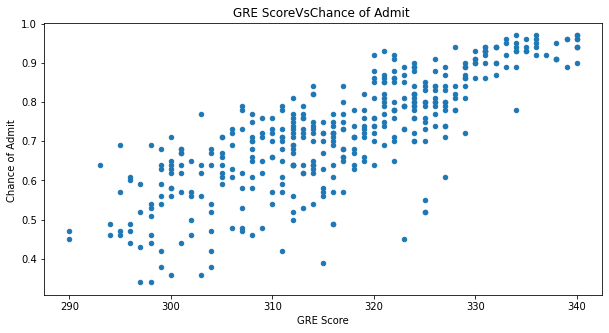

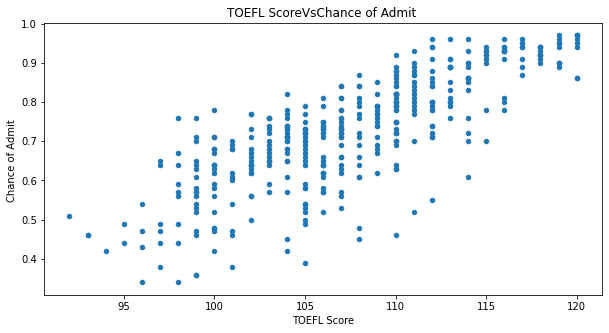

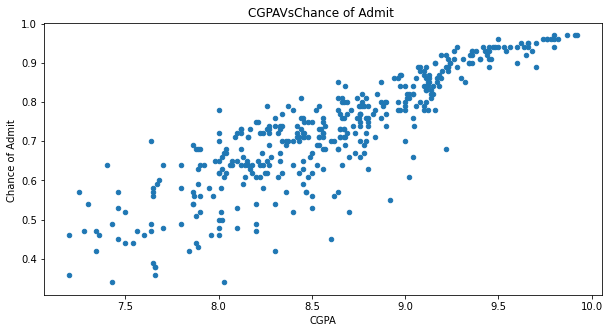

In [54]:
# Plotting scatter chart for each predictor vs the target variable
for predictor in df_num.columns:
    df.plot.scatter(x=predictor,y='Chance of Admit ',figsize=(10,5),title=predictor+"Vs"+ 'Chance of Admit ')
    

### Scatter charts interpretation

What should you look for in these scatter charts?

Trend. You should try to see if there is a visible trend or not. There could be three scenarios

Increasing Trend: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

Decreasing Trend: This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

No Trend: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Based on this chart you can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value for that we plot pearson correlation matrix using  heatmap

<AxesSubplot:>

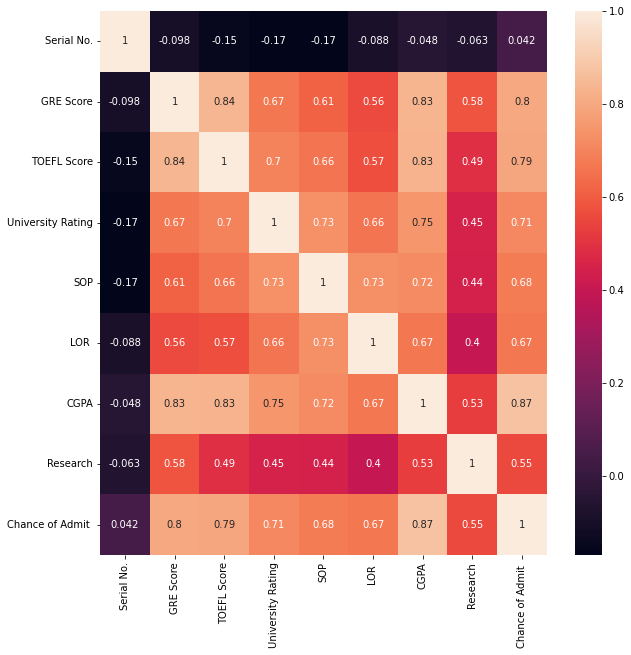

In [55]:
#Now we can plot pearson correlation matrix using heatmap to measure the strength bewteen continous feature and target

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='pearson'),annot=True)

If we see the above pearson correlation graph then we notice that continuous variable like
'GRE Score', 'TOFL Score' and 'CGPA'  having more than 0.5 in magnitude with Target column('Chance of Admit') thats means all three are highly correlated with Target variable so all these three are important for target.So we selected all these features

## Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 being true

In [56]:
# Defining a function to find the statistical relationship between target with all the feature categorical variables
def funcAnnova(inpData,TargetVariable,CategoricalPredictorList):
    from scipy.stats import f_oneway
    
    # Creating an empty list of final selected predictors
    SelectedPredictors = []
    print("########### Annova Result #############")
    for predictor in CategoricalPredictorList:
        CategoryGroupList = df.groupby(predictor)[TargetVariable].apply(list)
        AnnovaResult = f_oneway(*CategoryGroupList)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnnovaResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnnovaResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnnovaResult[1])
            
            
    return SelectedPredictors
            
            
        



In [57]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=df_cat.columns
funcAnnova(inpData=df, 
              TargetVariable='Chance of Admit ', 
              CategoricalPredictorList=CategoricalPredictorList)

########### Annova Result #############
University Rating is correlated with Chance of Admit  | P-Value: 1.313389994668425e-59
SOP is correlated with Chance of Admit  | P-Value: 7.2405682104781e-49
LOR  is correlated with Chance of Admit  | P-Value: 2.675772604311782e-47
Research is correlated with Chance of Admit  | P-Value: 1.9181733806927185e-33


['University Rating', 'SOP', 'LOR ', 'Research']

So the Result of Annova confirms that all these Categorical Variables are highly correlated with Target Variable(Continuous) so below are the selected categorical variable

['University Rating', 'SOP', 'LOR ', 'Research']

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [58]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In the above dataset we have column name with "Serial No" which is no of use so will drop this column

In [59]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [60]:
#This is the final dataset 
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


## Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning

* Converting each Ordinal Categorical columns to numeric
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other nominal categorical columns to numeric using pd.get_dummies()
* Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based       algorithms like KNN, or Neural Networks

In [61]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(df.iloc[:,:-1])

In [62]:
DataForML_Numeric['Chance of Admit '] = df['Chance of Admit ']
DataForML_Numeric

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


## Machine Learning: Splitting the data into Training and Testing sample

We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [63]:
#splitting into X and y

X = DataForML_Numeric.iloc[:,:-1].values
y = DataForML_Numeric['Chance of Admit '].values

In [64]:
X

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [65]:
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [66]:
#Random splitting into train test which means here we doing random sampling and extracting train sample and test sample
# from population data into 70:30 ratio

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [67]:
#Shape of X_train and y_train
X_train.shape,y_train.shape

((280, 7), (280,))

In [68]:
#Shape of X_test and y_test
X_test.shape,y_test.shape

((120, 7), (120,))

## Standardization/Normalization of data


However, if you are using KNN or Neural Networks distance based model, then this step becomes necessary.


In [69]:
### Standarization of the data ####
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Choose either StandardScaler or MinMaxScaler

#Here am using MinMaxScaler because on this data it produced better result than StandardScaler
#PredictorScaler = StandardScaler()
PredictorScaler = MinMaxScaler()


#Storing the fit object for later reference
PredictorScalerFit = PredictorScaler.fit(X)

#Transform the X data or Normalized the X data
X = PredictorScaler.transform(X)

#splitting the data into train test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)




In [70]:
#shape of Normalised data
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(280, 7) (280,)
(120, 7) (120,)


# Multiple Linear Regression

In [71]:
#Trained the Linear Regression Model

from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

#Print all the Parameters of LinearRegression
print(RegModel)

#train the model on train data
trained_model = RegModel.fit(X_train,y_train)
prediction = trained_model.predict(X_test)

#Measure the Goodness of fit of  model on train data
from sklearn import metrics
print('R2 Score:',metrics.r2_score(y_train,trained_model.predict(X_train)))


##############################################################################################
print('\n###### Model Validation and Model Accuracy Calculation')

#Printing original value with the prediction value

TestingDataResult = pd.DataFrame(data=X_test,columns=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'])

TestingDataResult['TargetVariable']=y_test

TestingDataResult['Predicted'+'TargetVariable'] = prediction





#Calculate the APE for each row to calculate the accuracy of the model
TestingDataResult['APE'] = 100 * ((np.abs(TestingDataResult['TargetVariable'] - TestingDataResult['PredictedTargetVariable'] )/
                                  TestingDataResult['TargetVariable']))

#Display the original test data with prediction values on X_test and its APE
print(TestingDataResult)

MeanAPE = np.mean(TestingDataResult['APE'])
MedianAPE =np.median(TestingDataResult['APE'])



#Accuracy

print("MeanAPE : ",100-MeanAPE)
print("MedianAPE: ",100-MedianAPE)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Score = make_scorer(Accuracy_Score,greater_is_better=True)


# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score


# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test and then train the 
#model on train data and test the model on test data
Accuracy_values=cross_val_score(RegModel,X,y,cv=10,scoring=custom_Score)
print("\nAccuracy values for 10 fold Cross Validation:\n",Accuracy_values)
print("\nFinal Accuracy values : ",np.round(np.mean(Accuracy_values),2))




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 Score: 0.8089992932929077

###### Model Validation and Model Accuracy Calculation
     GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  \
0         0.68     0.642857               0.75  0.500  0.625  0.650735   
1         0.66     0.642857               1.00  0.750  1.000  0.654412   
2         0.00     0.428571               0.75  0.250  0.375  0.095588   
3         0.46     0.214286               0.50  0.375  0.875  0.404412   
4         0.24     0.250000               0.00  0.250  0.250  0.018382   
..         ...          ...                ...    ...    ...       ...   
115       0.38     0.428571               0.25  0.250  0.375  0.389706   
116       0.72     0.857143               0.50  0.625  0.750  0.713235   
117       0.30     0.464286               0.25  0.500  0.250  0.378676   
118       0.12     0.321429               0.00  0.375  0.500  0.176471   
119       0.44     0.

##  Decision Tree

In [72]:
#Train Decision Tree model

from sklearn.tree import DecisionTreeRegressor
RegModel=DecisionTreeRegressor(max_depth=5)

#train the DecisionTreeRegression
trained_model = RegModel.fit(X_train,y_train)
prediction = trained_model.predict(X_test)


#Measure the Goodness of fit of  model on train data
from sklearn import metrics
print('R-score : ',metrics.r2_score(y_train,trained_model.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

TestingDataResult = pd.DataFrame(data=X_test,columns=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'])
TestingDataResult['Orig_TargetVariable'] = y_test
TestingDataResult['Pred_TargetVariable'] = prediction


#Calculate the APE for each row to calculate the accuracy of the model
TestingDataResult['APE'] = 100 * (np.abs(TestingDataResult['Orig_TargetVariable']-TestingDataResult['Pred_TargetVariable'])/
                  TestingDataResult['Orig_TargetVariable'])



#Printing the original value vs predicted value on test data with APE
print(TestingDataResult)

meanAPE = np.mean(TestingDataResult['APE'])
medianAPE = np.median(TestingDataResult['APE'])

#Accuracy
print("MAPE Accuracy :", 100-meanAPE)
print("MedianAPE Accuracy: ",100-medianAPE)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_score(orig,pred):
    MAPE=np.mean(100 *(np.abs(orig-pred)/orig))
    return (100-MAPE)


# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_score = make_scorer(Accuracy_score,greater_is_better=True)



#Import Cross validation
from sklearn.model_selection import cross_val_score


# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test and then train the 
#model on train data and test the model on test data
AccuracyList = cross_val_score(RegModel,X,y,cv=10,scoring=custom_score)
print('\n list of Accuracy for  10-fold Cross Validation ',AccuracyList)
print('\n Final Average Accuracy of 10-fold Cross Validation',np.round(np.mean(AccuracyList),2))


R-score :  0.8988861569574561

##### Model Validation and Accuracy Calculations ##########
     GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  \
0         0.68     0.642857               0.75  0.500  0.625  0.650735   
1         0.66     0.642857               1.00  0.750  1.000  0.654412   
2         0.00     0.428571               0.75  0.250  0.375  0.095588   
3         0.46     0.214286               0.50  0.375  0.875  0.404412   
4         0.24     0.250000               0.00  0.250  0.250  0.018382   
..         ...          ...                ...    ...    ...       ...   
115       0.38     0.428571               0.25  0.250  0.375  0.389706   
116       0.72     0.857143               0.50  0.625  0.750  0.713235   
117       0.30     0.464286               0.25  0.500  0.250  0.378676   
118       0.12     0.321429               0.00  0.375  0.500  0.176471   
119       0.44     0.642857               0.25  0.625  0.500  0.488971   

     Research  Orig_

## Random Forest

In [73]:
#RandomForest(Multiple Decision tree)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4,n_estimators=400,criterion='mse')
#Train the model
RF = RegModel.fit(X_train,y_train)

#Prediction
prediction = RF.predict(X_test)

#Check Goodness of fit of model on train data
from sklearn import metrics
print('R2 Score: ',metrics.r2_score(y_train,RF.predict(X_train)))

############################################################################
print("Model Validation and Accuracy Calculation")
TestingResult = pd.DataFrame(data=X_test,columns=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'])
TestingResult['OriginalY'] = y_test
TestingResult['PredictedY'] = prediction

#Calculate the APE for each row of Orig and Predicted y
TestingResult['APE'] = 100 * ((abs(TestingResult['OriginalY']-TestingResult['PredictedY']))/TestingResult['OriginalY'])

print(TestingResult)


MAPE = np.mean(TestingResult['APE'])
MedianAPE = np.median(TestingResult['APE'])

#Accuracy
print("Accuracy with MAPE: ",100-MAPE)
print("Accuracy with MedianAPE: ",100-MedianAPE)


#Custom function to get MAPE
def Accuracy_score(orig,pred):
    MAPE = np.mean(100*(abs(orig-pred)/orig))
    return (100-MAPE)



# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_score=make_scorer(Accuracy_score,greater_is_better=True)

#Cross validation 
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test and then train the 
#model on train data and test the model on test data
AccuracyList = cross_val_score(RegModel,X,y,cv=10,scoring=custom_score)
print("Accuracy list for 10 cross validation: ",AccuracyList)
print("\nFinal Average accuracy for 10 cross validation:  ",np.round(np.mean(AccuracyList),2))




R2 Score:  0.8645387813664192
Model Validation and Accuracy Calculation
     GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  \
0         0.68     0.642857               0.75  0.500  0.625  0.650735   
1         0.66     0.642857               1.00  0.750  1.000  0.654412   
2         0.00     0.428571               0.75  0.250  0.375  0.095588   
3         0.46     0.214286               0.50  0.375  0.875  0.404412   
4         0.24     0.250000               0.00  0.250  0.250  0.018382   
..         ...          ...                ...    ...    ...       ...   
115       0.38     0.428571               0.25  0.250  0.375  0.389706   
116       0.72     0.857143               0.50  0.625  0.750  0.713235   
117       0.30     0.464286               0.25  0.500  0.250  0.378676   
118       0.12     0.321429               0.00  0.375  0.500  0.176471   
119       0.44     0.642857               0.25  0.625  0.500  0.488971   

     Research  OriginalY  PredictedY   

# AdaBoost

In [74]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR = DecisionTreeRegressor(max_depth=4)
RegModel = AdaBoostRegressor(base_estimator=DTR,n_estimators=100,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(RegModel)

#train the model
ABoost=RegModel.fit(X_train,y_train)
prediction = ABoost.predict(X_test)

#Check the Goodness of fit of model on train
from sklearn import metrics
print('R2 score: ', metrics.r2_score(y_train,ABoost.predict(X_train)))

##########################################################################
print("\n############# Model Validation and Calulation of Accuracy ############")

TestingResult=pd.DataFrame(data=X_test,columns=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'])

TestingResult['OriginalY'] = y_test
TestingResult['PredictedY'] = prediction


#Calculation of APE for each row of Original and Predicted
TestingResult['APE'] = 100 * (np.abs(TestingResult['OriginalY']-TestingResult['PredictedY'])/TestingResult['OriginalY'])

print(TestingResult)

MAPE = np.mean(TestingResult['APE'])
MedianAPE = np.median(TestingResult['APE'])

###Acuuracy
print("Accuracy using MAPE: ",100-MAPE)
print("Accuracy using Median: ",100-MedianAPE)


#Custom function to calculate the Accuracy
def AccuracyScore(orig,pred):
    MAPE = np.mean(100 * np.abs(orig-pred)/orig)
    return 100-MAPE

from sklearn.metrics import make_scorer
custom_score=make_scorer(Accuracy_Score,greater_is_better=True)

#Cross validation
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test and then train the 
# model on train data and test the model on test data
AccuracyList=cross_val_score(RegModel,X,y,cv=10,scoring=custom_score)
print("Accuracy list: ",AccuracyList)
print("\n Final Average Accuracy: ",np.round(np.mean(AccuracyList),2))







AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

# XGBOOST

In [75]:
#!pip install xgboost

In [76]:
# Xtreme Gradient Boosting
from xgboost import XGBRegressor

RegModel = XGBRegressor(max_depth=3,
                        learning_rate=0.02,
                        booster='gbtree',
                        n_estimators=500)

#train the model
XGB=RegModel.fit(X_train,y_train)
prediction = XGB.predict(X_test)


#Checking the goodness of fit of model on train data
from sklearn.metrics import r2_score
print("R2 Score: ",r2_score(y_train,XGB.predict(X_train)))

#########################################################################
print("\n##############Model Validation and Accuracy Calculation######################")
TestingResult=pd.DataFrame(data=X_test,columns=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'])

TestingResult['OriginalY'] = y_test
TestingResult['PredictedY'] = prediction

#Calculate the APE for Original and Predicted for each row
TestingResult['APE'] = 100 *( abs(TestingResult['OriginalY']-TestingResult['PredictedY'])/TestingResult['OriginalY'])

print(TestingResult)

MAPE = np.mean(TestingResult['APE'])
MedianAPE = np.median(TestingResult['APE'])

#Accuracy
print("Accuracy using MAPE: ",100-MAPE)
print("Accuracy using MAPE: ",100-MedianAPE)


#Custom function for MAPE calculation
def AccuracyScore(orig,pred):
    MAPE = np.mean(100 * (abs(orig-pred)/orig))
    return 100-MAPE

#Custom score
from sklearn.metrics import make_scorer
custom_score = make_scorer(AccuracyScore,greater_is_better=True)

#Cross validation

#Running 10 fold cross validation on the algorithm.
#Passing full dataset to cross validation and it automatically split train / test dataset and train model on train data
# and test model on test data

from sklearn.model_selection import cross_val_score
AccuracyList = cross_val_score(RegModel,X,y,cv=10,scoring=custom_score)
print("List of Accuracy for 10 fold cross validation: ",AccuracyList)
print("\n Final Average Accuracy :",np.round(np.mean(AccuracyList),2))





R2 Score:  0.9236381979777635

##############Model Validation and Accuracy Calculation######################
     GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  \
0         0.68     0.642857               0.75  0.500  0.625  0.650735   
1         0.66     0.642857               1.00  0.750  1.000  0.654412   
2         0.00     0.428571               0.75  0.250  0.375  0.095588   
3         0.46     0.214286               0.50  0.375  0.875  0.404412   
4         0.24     0.250000               0.00  0.250  0.250  0.018382   
..         ...          ...                ...    ...    ...       ...   
115       0.38     0.428571               0.25  0.250  0.375  0.389706   
116       0.72     0.857143               0.50  0.625  0.750  0.713235   
117       0.30     0.464286               0.25  0.500  0.250  0.378676   
118       0.12     0.321429               0.00  0.375  0.500  0.176471   
119       0.44     0.642857               0.25  0.625  0.500  0.488971   

  

# KNN

In [77]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor

RegModel = KNeighborsRegressor()

#train the model
KNN=RegModel.fit(X_train,y_train)
prediction = KNN.predict(X_test)


#Checking the goodness of fit of model on train data
from sklearn.metrics import r2_score
print("R2 Score: ",r2_score(y_train,KNN.predict(X_train)))

#########################################################################
print("\n##############Model Validation and Accuracy Calculation######################")
TestingResult=pd.DataFrame(data=X_test,columns=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'])

TestingResult['OriginalY'] = y_test
TestingResult['PredictedY'] = prediction

#Calculate the APE for Original and Predicted for each row
TestingResult['APE'] = 100 *( abs(TestingResult['OriginalY']-TestingResult['PredictedY'])/TestingResult['OriginalY'])

print(TestingResult)

MAPE = np.mean(TestingResult['APE'])
MedianAPE = np.median(TestingResult['APE'])

#Accuracy
print("Accuracy using MAPE: ",100-MAPE)
print("Accuracy using MAPE: ",100-MedianAPE)


#Custom function for MAPE calculation
def AccuracyScore(orig,pred):
    MAPE = np.mean(100 * (abs(orig-pred)/orig))
    return 100-MAPE

#Custom score
from sklearn.metrics import make_scorer
custom_score = make_scorer(AccuracyScore,greater_is_better=True)

#Cross validation

#Running 10 fold cross validation on the algorithm.
#Passing full dataset to cross validation and it automatically split train / test dataset and train model on train data
# and test model on test data

from sklearn.model_selection import cross_val_score
AccuracyList = cross_val_score(RegModel,X,y,cv=10,scoring=custom_score)
print("List of Accuracy for 10 fold cross validation: ",AccuracyList)
print("\n Final Average Accuracy :",np.round(np.mean(AccuracyList),2))


R2 Score:  0.830523087433723

##############Model Validation and Accuracy Calculation######################
     GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  \
0         0.68     0.642857               0.75  0.500  0.625  0.650735   
1         0.66     0.642857               1.00  0.750  1.000  0.654412   
2         0.00     0.428571               0.75  0.250  0.375  0.095588   
3         0.46     0.214286               0.50  0.375  0.875  0.404412   
4         0.24     0.250000               0.00  0.250  0.250  0.018382   
..         ...          ...                ...    ...    ...       ...   
115       0.38     0.428571               0.25  0.250  0.375  0.389706   
116       0.72     0.857143               0.50  0.625  0.750  0.713235   
117       0.30     0.464286               0.25  0.500  0.250  0.378676   
118       0.12     0.321429               0.00  0.375  0.500  0.176471   
119       0.44     0.642857               0.25  0.625  0.500  0.488971   

   

# SVM

In [78]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

#Checking the goodness of fit of model on train data
from sklearn.metrics import r2_score
print("R2 Score: ",r2_score(y_train,SVM.predict(X_train)))

#########################################################################
print("\n##############Model Validation and Accuracy Calculation######################")
TestingResult=pd.DataFrame(data=X_test,columns=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'])

TestingResult['OriginalY'] = y_test
TestingResult['PredictedY'] = prediction

#Calculate the APE for Original and Predicted for each row
TestingResult['APE'] = 100 *( abs(TestingResult['OriginalY']-TestingResult['PredictedY'])/TestingResult['OriginalY'])

print(TestingResult)

MAPE = np.mean(TestingResult['APE'])
MedianAPE = np.median(TestingResult['APE'])

#Accuracy
print("Accuracy using MAPE: ",100-MAPE)
print("Accuracy using MAPE: ",100-MedianAPE)


#Custom function for MAPE calculation
def AccuracyScore(orig,pred):
    MAPE = np.mean(100 * (abs(orig-pred)/orig))
    return 100-MAPE

#Custom score
from sklearn.metrics import make_scorer
custom_score = make_scorer(AccuracyScore,greater_is_better=True)

#Cross validation

#Running 10 fold cross validation on the algorithm.
#Passing full dataset to cross validation and it automatically split train / test dataset and train model on train data
# and test model on test data

from sklearn.model_selection import cross_val_score
AccuracyList = cross_val_score(RegModel,X,y,cv=10,scoring=custom_score)
print("List of Accuracy for 10 fold cross validation: ",AccuracyList)
print("\n Final Average Accuracy :",np.round(np.mean(AccuracyList),2))


SVR(C=50, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R2 Score:  0.7704775758157609

##############Model Validation and Accuracy Calculation######################
     GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  \
0         0.68     0.642857               0.75  0.500  0.625  0.650735   
1         0.66     0.642857               1.00  0.750  1.000  0.654412   
2         0.00     0.428571               0.75  0.250  0.375  0.095588   
3         0.46     0.214286               0.50  0.375  0.875  0.404412   
4         0.24     0.250000               0.00  0.250  0.250  0.018382   
..         ...          ...                ...    ...    ...       ...   
115       0.38     0.428571               0.25  0.250  0.375  0.389706   
116       0.72     0.857143               0.50  0.625  0.750  0.713235   
117       0.30     0.464286               0.25  0.500  0.250  0.378676   
118   